In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [145]:
tips = sns.load_dataset('tips')
sns.set_style("whitegrid")

In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [416]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
tips.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


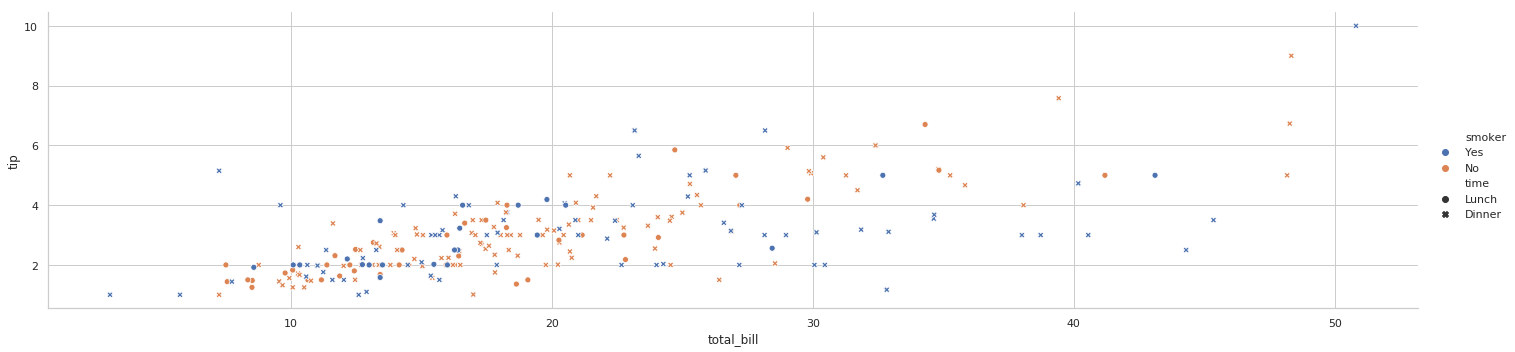

In [170]:
sns.relplot(x='total_bill',y='tip',data=tips,kind='scatter',style='time',hue='smoker',aspect=4)

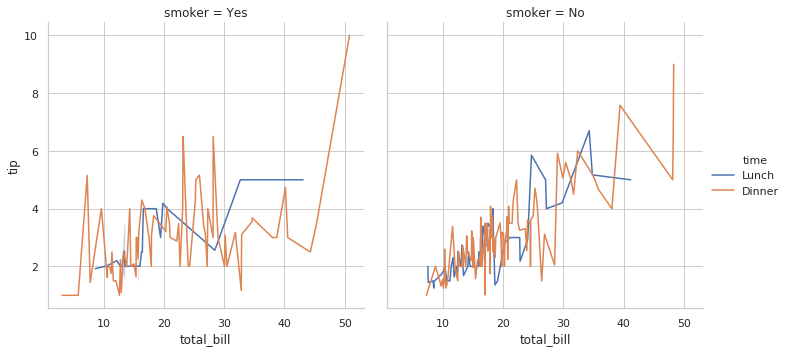

In [143]:

sns.relplot(x='total_bill',y='tip',data=tips,kind='line',hue='time',col='smoker')

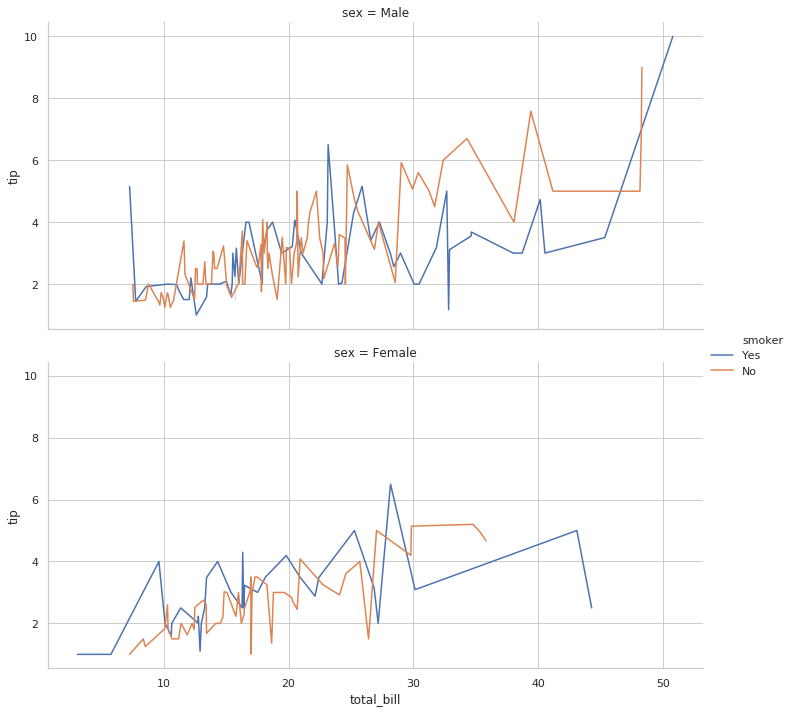

In [110]:
sns.relplot(x='total_bill',y='tip',data=tips,kind='line',hue='smoker',row='sex',aspect=2)

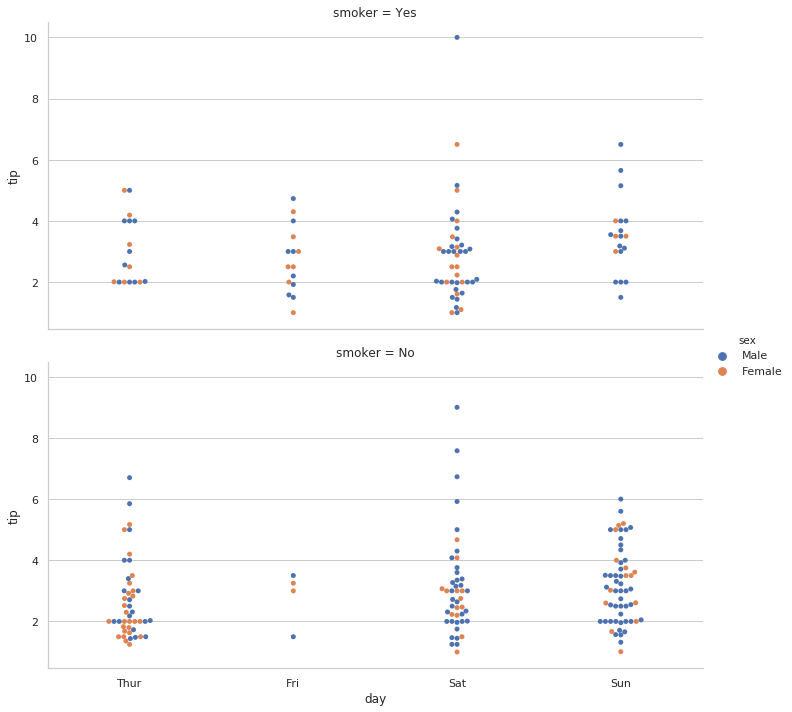

In [142]:
# sns.catplot(x='day',y='tip',data=tips,palette="YlGnBu_d")

sns.catplot(x='day',y='tip',data=tips,hue='sex',kind='swarm',row='smoker',aspect=2)

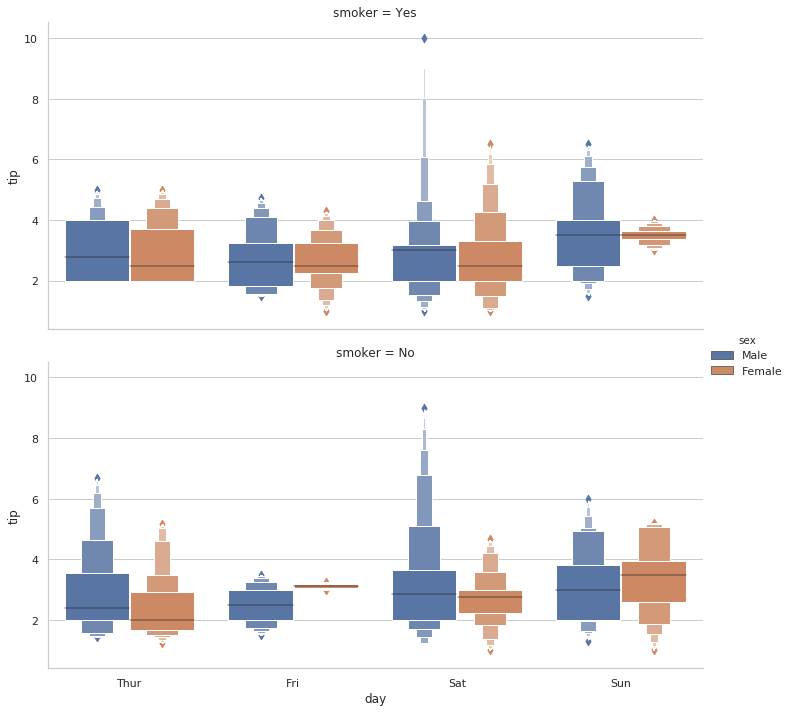

In [141]:

sns.catplot(x='day',y='tip',data=tips,hue='sex',kind='boxen',row='smoker',aspect=2)

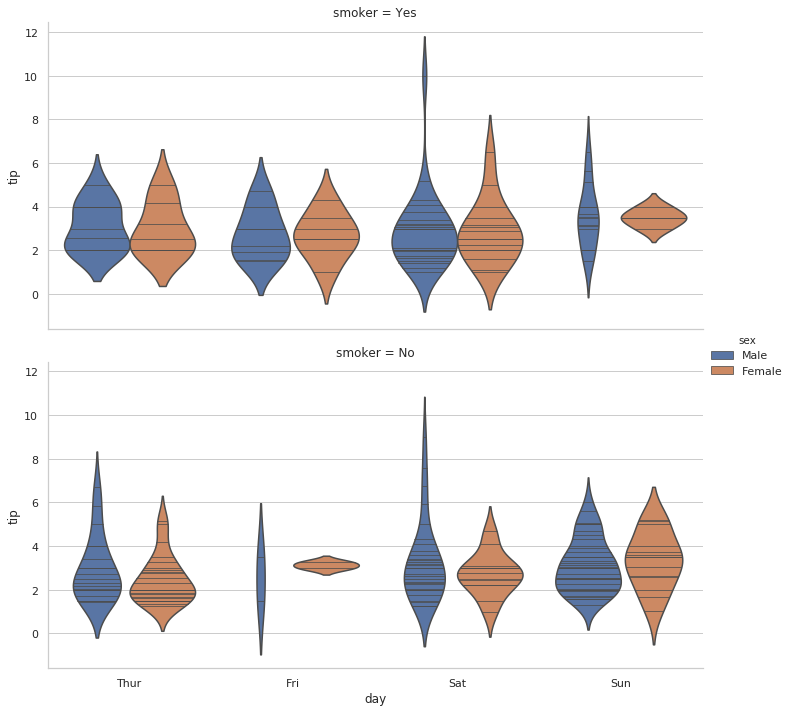

In [140]:

sns.catplot(x='day',y='tip',data=tips,hue='sex',kind='violin',row='smoker',inner='stick',aspect=2)

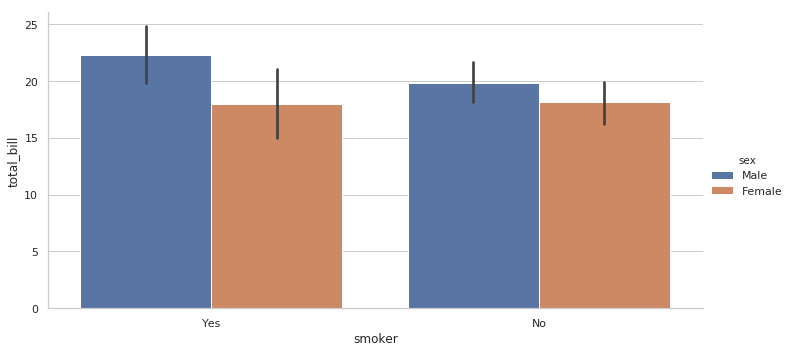

In [139]:

sns.catplot(x='smoker',y='total_bill',data=tips,hue='sex',kind='bar',aspect=2)

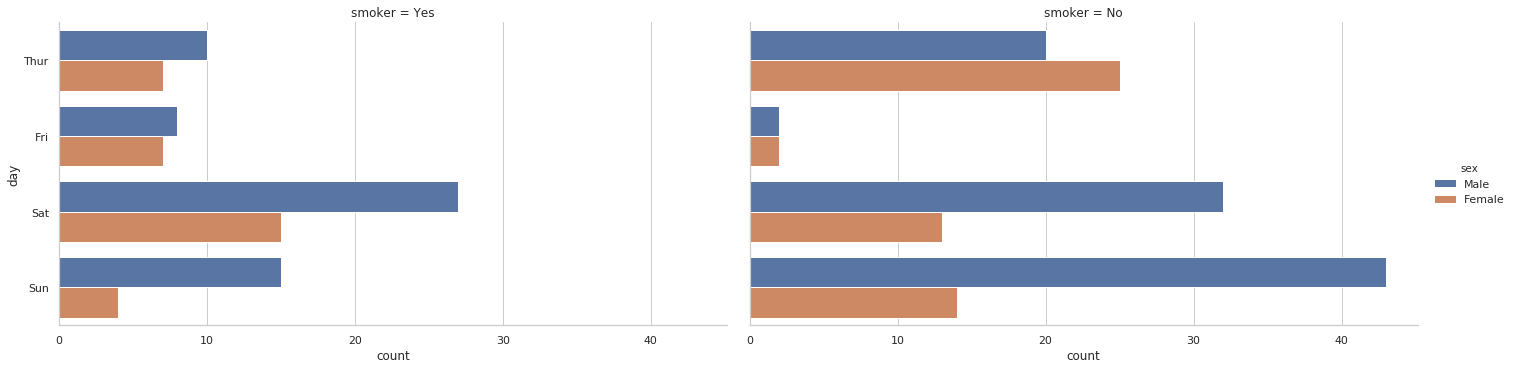

In [137]:

sns.catplot(y='day',hue='sex',data=tips,kind='count',col='smoker',aspect=2)

In [128]:
# sns.catplot(x="class", y="survived", hue="sex",
#             palette={"male": "g", "female": "m"},
#             markers=["^", "o"], linestyles=["-", "--"],
#             kind="point", data=titanic);

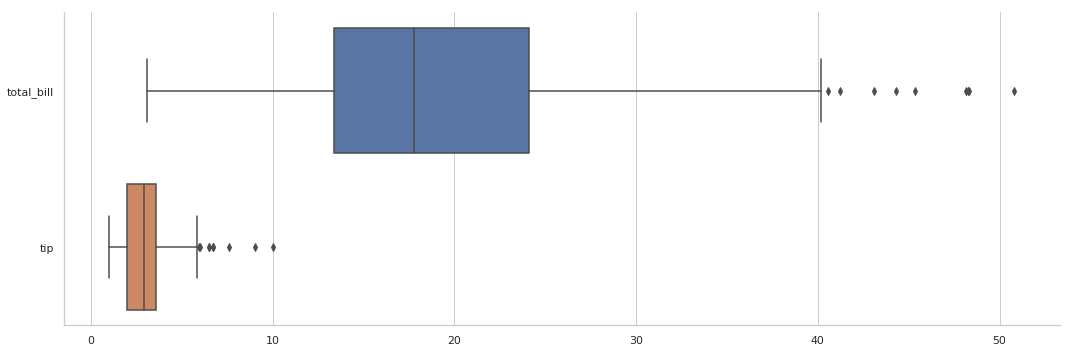

In [157]:
sns.catplot(data=tips[['total_bill','tip']], orient="h", kind="box",aspect=3);

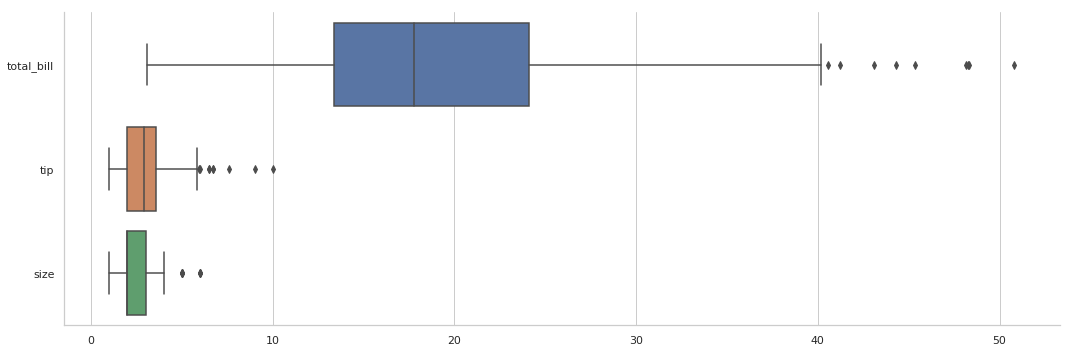

In [163]:
sns.catplot(data=tips.query('total_bill > 0'), orient="h", kind="box",aspect=3);

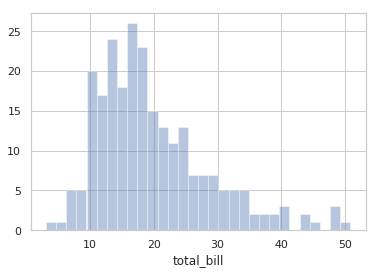

In [175]:
sns.distplot(tips.total_bill,kde=False,bins=30)

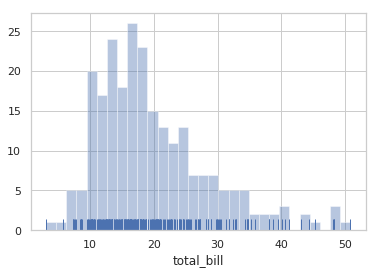

In [176]:
sns.distplot(tips.total_bill,kde=False,rug=True,bins=30)

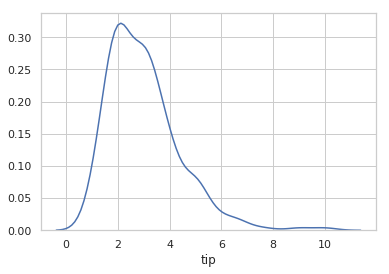

In [181]:
sns.distplot(tips.tip,hist=False,bins=30)

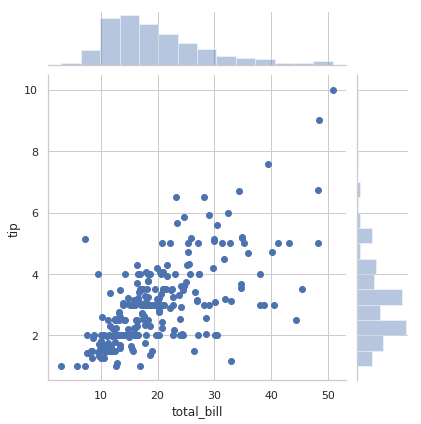

In [187]:
sns.jointplot(x='total_bill',y='tip',data=tips)

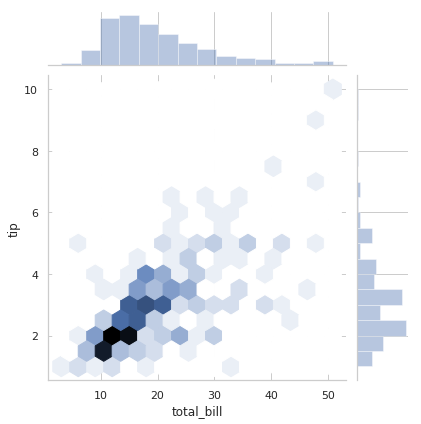

In [188]:
sns.jointplot(x='total_bill',y='tip',kind='hex',data=tips)

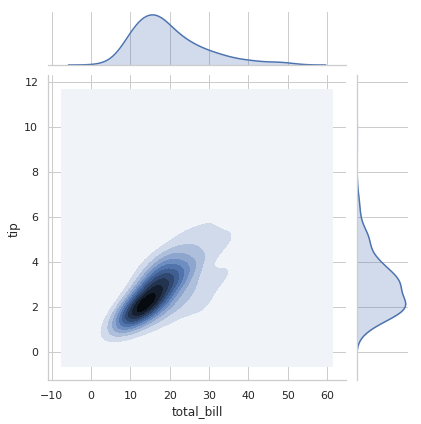

In [189]:
sns.jointplot(x='total_bill',y='tip',kind='kde',data=tips)

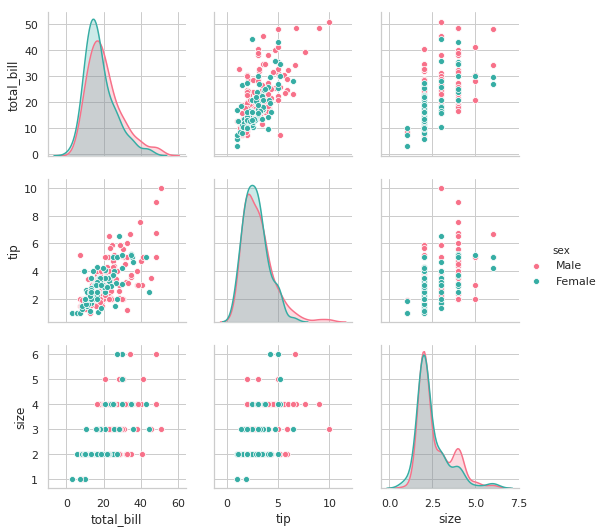

In [191]:
sns.pairplot(tips,hue="sex", palette="husl")

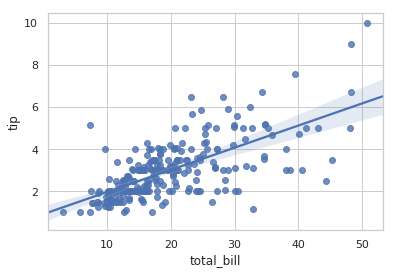

In [204]:
sns.regplot(x="total_bill", y="tip", data=tips)

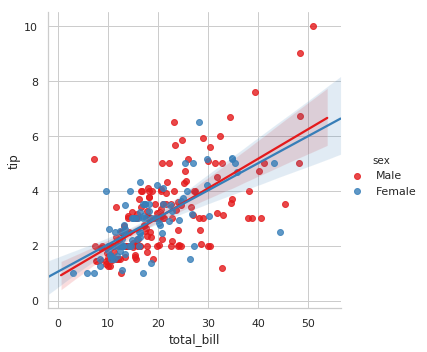

In [202]:
sns.lmplot(x="total_bill", y="tip", data=tips,hue='sex',palette="Set1")

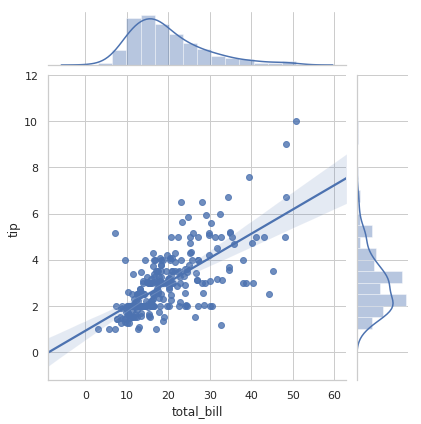

In [205]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")

In [221]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [222]:
sex_dum = pd.get_dummies(tips[['sex']])

In [223]:
sex_dum.head(10)

,sex_Male,sex_Female
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [224]:
merge_sex_dum = pd.concat([tips,sex_dum],axis='columns')
merge_sex_dum.head()

,total_bill,tip,sex,smoker,day,time,size,sex_Male,sex_Female
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1


In [225]:
after_drop = merge_sex_dum.drop(['sex','sex_Female'],axis='columns')
after_drop.head()

,total_bill,tip,smoker,day,time,size,sex_Male
0,16.99,1.01,No,Sun,Dinner,2,0
1,10.34,1.66,No,Sun,Dinner,3,1
2,21.01,3.50,No,Sun,Dinner,3,1
3,23.68,3.31,No,Sun,Dinner,2,1
4,24.59,3.61,No,Sun,Dinner,4,0


In [226]:
smok_dum = pd.get_dummies(tips[['smoker']])
smok_dum.head()

,smoker_Yes,smoker_No
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [228]:
merge_smok_dum = pd.concat([after_drop,smok_dum],axis='columns')
merge_smok_dum.head()

,total_bill,tip,smoker,day,time,size,sex_Male,smoker_Yes,smoker_No
0,16.99,1.01,No,Sun,Dinner,2,0,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,0,1
2,21.01,3.50,No,Sun,Dinner,3,1,0,1
3,23.68,3.31,No,Sun,Dinner,2,1,0,1
4,24.59,3.61,No,Sun,Dinner,4,0,0,1


In [229]:
after_sec_drop = merge_smok_dum.drop(['smoker','smoker_No'],axis='columns')
after_sec_drop.head()

,total_bill,tip,day,time,size,sex_Male,smoker_Yes
0,16.99,1.01,Sun,Dinner,2,0,0
1,10.34,1.66,Sun,Dinner,3,1,0
2,21.01,3.50,Sun,Dinner,3,1,0
3,23.68,3.31,Sun,Dinner,2,1,0
4,24.59,3.61,Sun,Dinner,4,0,0


In [231]:
time_dum = pd.get_dummies(tips[['time']])
merge_time_dum = pd.concat([after_sec_drop,time_dum],axis='columns')
merge_time_dum.head()

,total_bill,tip,day,time,size,sex_Male,smoker_Yes,time_Lunch,time_Dinner
0,16.99,1.01,Sun,Dinner,2,0,0,0,1
1,10.34,1.66,Sun,Dinner,3,1,0,0,1
2,21.01,3.50,Sun,Dinner,3,1,0,0,1
3,23.68,3.31,Sun,Dinner,2,1,0,0,1
4,24.59,3.61,Sun,Dinner,4,0,0,0,1


In [232]:
after_third_drop = merge_time_dum.drop(['time','time_Lunch'],axis='columns')
after_third_drop.head()

,total_bill,tip,day,size,sex_Male,smoker_Yes,time_Dinner
0,16.99,1.01,Sun,2,0,0,1
1,10.34,1.66,Sun,3,1,0,1
2,21.01,3.50,Sun,3,1,0,1
3,23.68,3.31,Sun,2,1,0,1
4,24.59,3.61,Sun,4,0,0,1


In [387]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

In [388]:
le = preprocessing.LabelEncoder()
after_third_drop['day']=le.fit_transform(after_third_drop['day'])

In [389]:
le.classes_

array([0, 1, 2, 3])

In [390]:
final_tip = after_third_drop

In [391]:
#sun= 2, sat = 1,fri=0
final_tip.columns

Index(['total_bill', 'tip', 'day', 'size', 'sex_Male', 'smoker_Yes',
       'time_Dinner'],
      dtype='object')

In [392]:
X = final_tip[['total_bill','day', 'size', 'sex_Male', 'smoker_Yes',
       'time_Dinner']]

In [393]:
y = final_tip['tip']

In [417]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [418]:
linReg = linear_model.LinearRegression()

In [419]:
linReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [420]:
linReg.score(X_test,y_test)

0.287644754943695

In [421]:
predicted_val = linReg.predict(X_test)

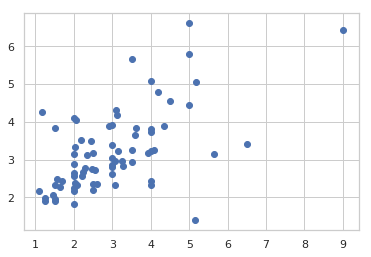

In [422]:
plt.scatter(y_test,predicted_val)

In [423]:
linReg.coef_

array([ 0.10847633, -0.07954888,  0.14133955, -0.06951827, -0.20774985,
       -0.17236732])

In [424]:
linReg.intercept_

0.9405457629589291

In [425]:
(0.10847633*24.59)+(-0.07954888*2)+(0.14133955*4)+(-0.06951827*0)+(-0.20774985*0)+(-0.17236732*1)+0.9405457629589291

3.841871837658929

In [426]:
metrics.mean_absolute_error(y_test,predicted_val)

0.8405399384384302

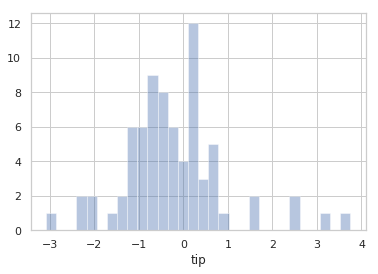

In [430]:
sns.distplot((y_test-predicted_val),bins=30,kde=False)